# AB Fresh Supply Co. Ltd.
Company Introduction

Client :  Abalone Producing and Processing company.

Scope  : Supply the highest quality of abalones with a good price through direct transactions with fish farms.
         They have experience in exporting abalones to North America as well as South East Asia.
         
Problem: To find the highest quality abalones, they need to analyze their measurements.
         One of the key measurements in this process is the age of the abalone.

Current Scenario : The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number                     of rings through a microscope. By adding 1.5 to the number of rings, we get the abalone’s age in years.

## Problem Statement

The current process suffers from the following problems:

Since the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.
This becomes a quite boring and time-consuming task.

The company wants to automate the process of predicting the age of abalone from other physical measurements rather than doing this manual work.

###  Project  Requirements
So role as a data scientist is to build the best possible model regression model to predict the number of rings for each abalone using the given dataset containing the physical measurements of abalones.

Target Variable: Rings
Evaluation Metric : The model evaluation will be based on the RMSE score.

## Importing Libraries

In [30]:
import numpy as np
import pandas as pd
# Importing pyplot interface using matplotlib
import matplotlib.pyplot as plt                                     
# Importing seaborm library for interactive visualization
import seaborn as sns                                               
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split               
from sklearn.linear_model import LinearRegression
# Importing warning to disable runtime warnings
import warnings                                                     
# Warnings will appear only once
warnings.filterwarnings("ignore")  
import matplotlib.pyplot as plt

# stats
import statsmodels.api as sm
import scipy.stats as stats

## Details of train and test data

In [31]:
abalone_test_data = pd.read_csv("abalone_test.csv", index_col = 0)
abalone_train_data = pd.read_csv("abalone_train.csv", index_col = 0)

In [32]:
print(abalone_train_data.shape)
print(abalone_test_data.shape)

(3341, 9)
(836, 8)


In [33]:
print('Contains Duplicate Rows?', abalone_train_data.duplicated().any())
print(abalone_train_data.isnull().sum())

Contains Duplicate Rows? False
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [34]:
print('Contains Duplicate Rows?', abalone_test_data.duplicated().any())
print(abalone_test_data.isnull().sum())

Contains Duplicate Rows? False
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64


In [35]:
abalone_train_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Id,,,,,,,,,
3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [36]:
abalone_test_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Id,,,,,,,,
668,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [37]:
# Dataset Feature Description
# The Dataset contains the following columns:

# Column Name	Description
# ID	Unique Id of the sample.
# Sex	The sex of the abalone (M, F, and I (infant)).
# Length	Longest shell measurement (mm).
# Diameter	Diameter of abalone perpendicular to length (mm).
# Height	Height of abalone with meat in the shell (mm).
# Whole_weight	Weight of the whole abalone (grams).
# Shucked_weight	Weight of the meat of abalone (grams).
# Viscera_weight	Gut weight (after bleeding) of the abalone (grams).
# Shell_weight	Weight of the abalone after being dried (grams).
# Rings	Number of Rings in the abalone.

In [38]:
abalone_train_data.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3341 entries, 3141 to 2732
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3341 non-null   object 
 1   Length          3341 non-null   float64
 2   Diameter        3341 non-null   float64
 3   Height          3341 non-null   float64
 4   Whole_weight    3341 non-null   float64
 5   Shucked_weight  3341 non-null   float64
 6   Viscera_weight  3341 non-null   float64
 7   Shell_weight    3341 non-null   float64
 8   Rings           3341 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 424.2 KB


In [39]:
abalone_train_data.nunique()

Sex                  3
Length             134
Diameter           110
Height              51
Whole_weight      2148
Shucked_weight    1421
Viscera_weight     857
Shell_weight       864
Rings               27
dtype: int64

In [40]:
abalone_train_data.describe().T.style.highlight_null(null_color = 'red').highlight_min()

,count,mean,std,min,25%,50%,75%,max
Length,3341.000000,0.525887,0.119759,0.075000,0.450000,0.545000,0.620000,0.815000
Diameter,3341.000000,0.409463,0.098895,0.055000,0.350000,0.425000,0.485000,0.650000
Height,3341.000000,0.140129,0.042623,0.000000,0.115000,0.145000,0.165000,1.130000
Whole_weight,3341.000000,0.838176,0.493789,0.002000,0.444500,0.810000,1.168500,2.779500
Shucked_weight,3341.000000,0.363600,0.224156,0.001000,0.188000,0.341500,0.509500,1.488000
Viscera_weight,3341.000000,0.182507,0.110439,0.000500,0.093500,0.172500,0.255500,0.760000
Shell_weight,3341.000000,0.241385,0.139828,0.001500,0.132000,0.235000,0.330000,1.005000
Rings,3341.000000,9.958396,3.205591,1.000000,8.000000,10.000000,11.000000,27.000000


### Key insights from the above statistics :

In [41]:
# No missing values in the dataset.
# All numerical features but 'sex'.
# Though features are not normaly distributed, are close to normality.
# None of the features have minimum = 0 .
# Each feature has difference scale range.
# The analysis shows that the Ring attribute values ranges from 1 to 27 rings on an abalone specimen.
# However, the most frequent values of Rings are highly concentrated around the median of the distribution, 
# so that, the 2nd and 3rd quartiles are defined in a range of less than 1 std deviation.
# We observe that its possible to approximate the distribution of this attribute to a normal curve.

In [42]:
# Creating a crosstab between id, length, heght and diameter grp features
pd.crosstab(index=abalone_train_data['Rings'][20:40], columns=[abalone_train_data['Length'][20:40],
            abalone_train_data['Diameter'][20:40],abalone_train_data['Height'][20:40]], margins=True).style.background_gradient(cmap='winter')

In [43]:
# Creating a crosstab between id, length, heght and diameter grp features
pd.crosstab(index=abalone_train_data['Rings'][20:30], columns=[abalone_train_data['Sex'][20:30],
            abalone_train_data['Shucked_weight'][20:30]], margins=True).style.background_gradient(cmap='summer')

In [44]:
combo = pd.pivot_table(abalone_train_data, values='Diameter', index=['Height', 'Length'], aggfunc=np.mean)
combo.transpose().style.background_gradient(cmap='spring_r')

<AxesSubplot:ylabel='Density'>

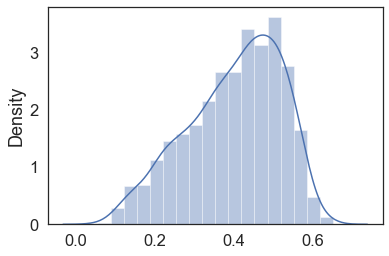

In [45]:
sns.distplot(combo)

In [46]:
(abalone_train_data["Height"] == 0).sum()

2

In [47]:
abalone_train_data[abalone_train_data["Height"] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Id,,,,,,,,,
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [48]:
## The number of missing values is 2 and is in the infant abalone and we assign the value 0 to null. 
## We will fill in the missing value with the average Height feature for the infant gender.

In [49]:
abalone_train_data.groupby('Sex')['Height'].agg(['mean', 'min', 'max']).style.background_gradient(cmap='summer')

,mean,min,max
Sex,,,
F,0.158426,0.015000,1.130000
I,0.107788,0.000000,0.220000
M,0.152005,0.040000,0.515000


In [50]:
abalone_train_data['Height']=abalone_train_data['Height'].replace(to_replace=0, value = 0.1077)

In [51]:
decimals = 4    
abalone_train_data['Shucked_weight'] = abalone_train_data['Shucked_weight'].apply(lambda x: round(x, decimals))

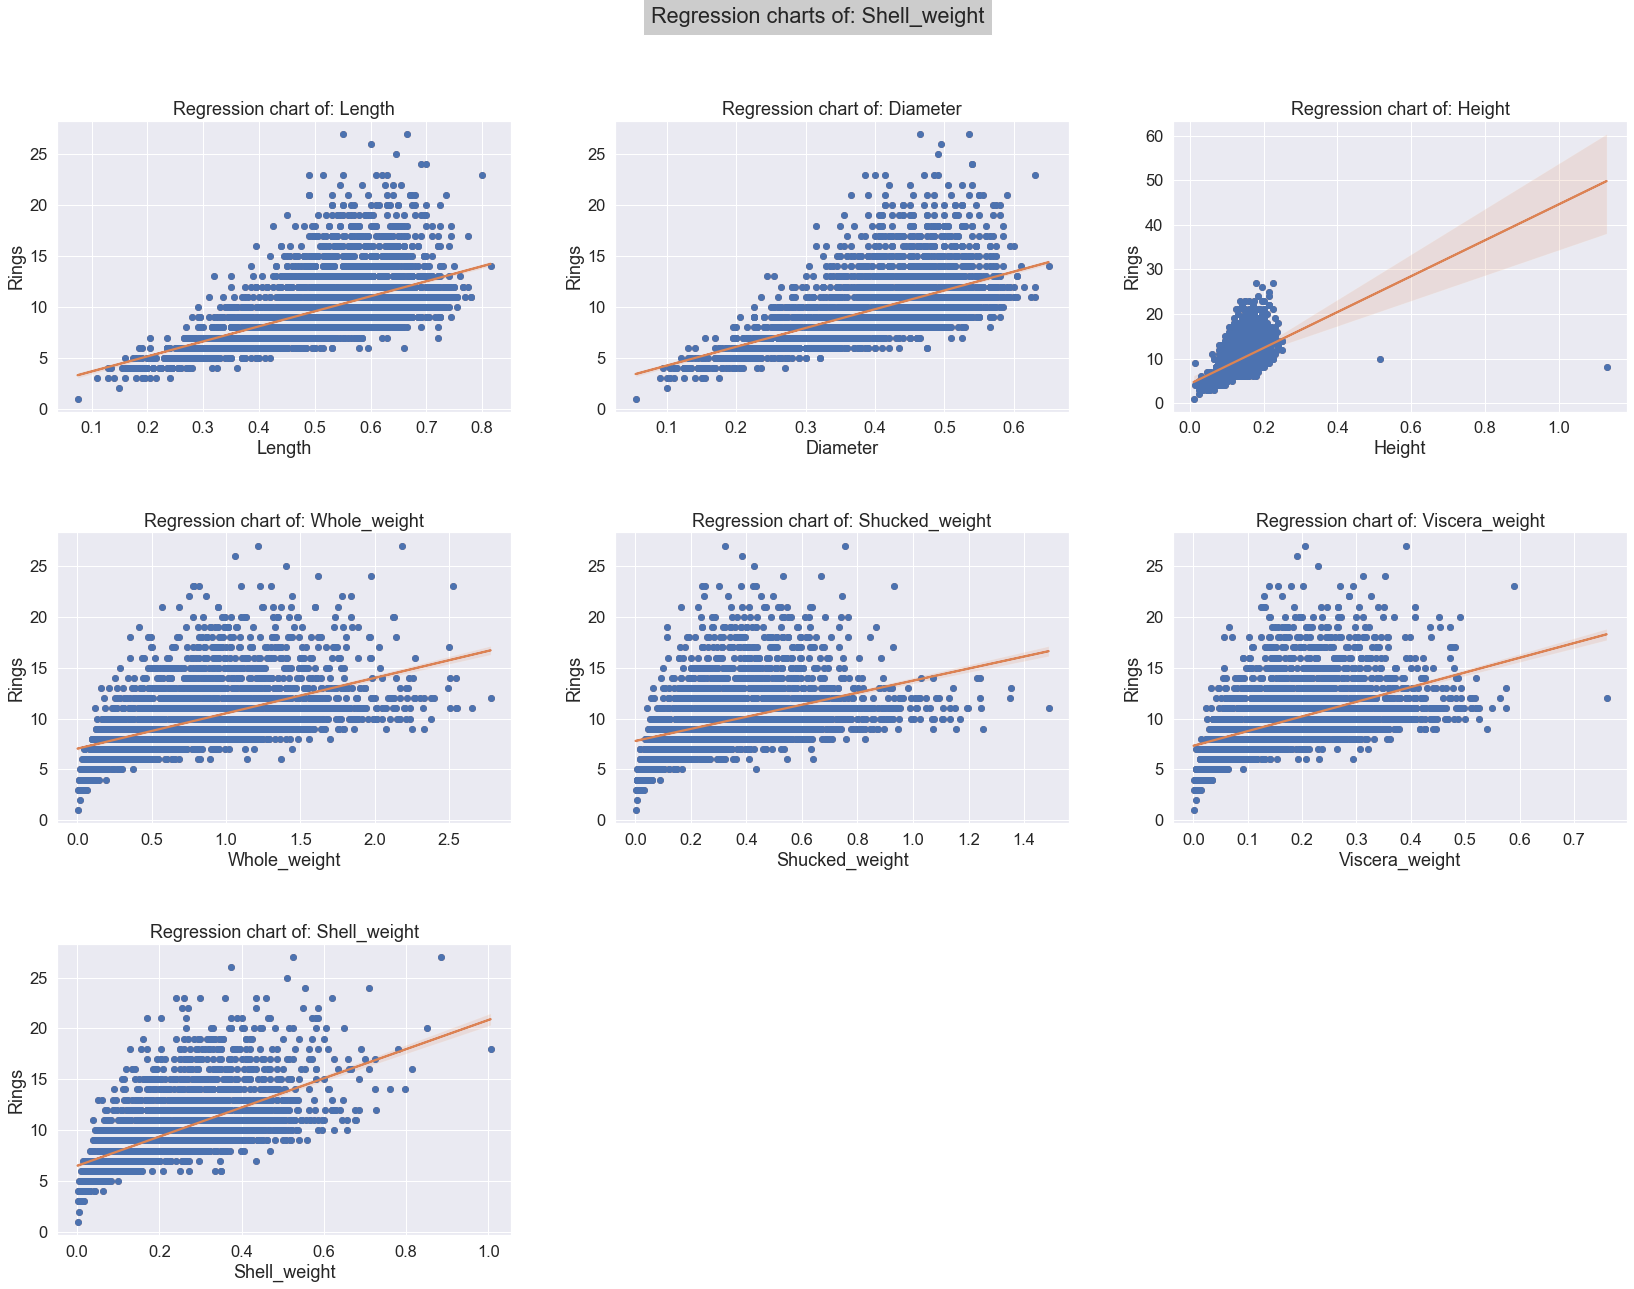

In [54]:
feature_cols=['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']
fig = plt.figure(figsize=(24, 24))
# Plotting Regression chart for each predictor vs the target variable
for u in feature_cols:             
    #print(u)
    cntss = feature_cols.index(u)    
    #print(cntss)
    x, y = abalone_train_data[u], abalone_train_data.Rings 
    beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)        
    yhat = beta * x + beta0 # regression line 
    fig.tight_layout(pad=3.0)
    sns.set(font_scale=1.5)
    plt.suptitle("Regression line with scatterplot", bbox={'facecolor':'0.8', 'pad':5}, fontsize = 14)   
    subsc = fig.add_subplot(4, 3, cntss+1)
    #colors = np.random.rand(4)
    sns.set_style("white")
    plt.plot(x, yhat, 'r-', x, y,'o')
    #subsc.set_xlabel(u.upper() +" VS "+ 'Rings')         
    plt.xlabel(u)
    plt.ylabel('Rings')    
    sns.regplot(x=u, y="Rings", data=abalone_train_data, ax=subsc)                          
    #print("y = %f x + %f, r: %f, r-squared: %f,\np-value: %f, std_err: %f"
    #% (beta, beta0, r_value, r_value**2, p_value, std_err))
    plt.suptitle('Regression charts of: '+ str(u))   
    subsc.title.set_text('Regression chart of: '+ str(u))   
    #subsc.title.set_text("y = %f x + %f, r: %f, r-squared: %f,\np-value: %f, std_err: %f"
    #% (beta, beta0, r_value, r_value**2, p_value, std_err))   

Text(0.5, 0.98, 'Bar plot of Sex Vs Height, Length, Diameter, Whole_weight')

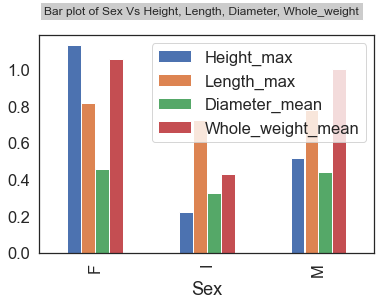

In [55]:
able_grp = abalone_train_data.groupby('Sex').agg(Height_max=pd.NamedAgg(column='Height', aggfunc=max),
                                            Length_max=pd.NamedAgg(column='Length', aggfunc=pd.Series.max),
                                            Diameter_mean=pd.NamedAgg(column='Diameter', aggfunc=pd.Series.mean),
                                            Whole_weight_mean=pd.NamedAgg(column='Whole_weight', aggfunc=pd.Series.mean))
able_grp.plot(kind='bar')
plt.suptitle("Bar plot of Sex Vs Height, Length, Diameter, Whole_weight", bbox={'facecolor':'0.8'},fontsize = 12)

## Univariate analysis
### Understanding feature wise statistics

In [56]:
abalone_train_data.Rings.describe().T

count    3341.000000
mean        9.958396
std         3.205591
min         1.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        27.000000
Name: Rings, dtype: float64

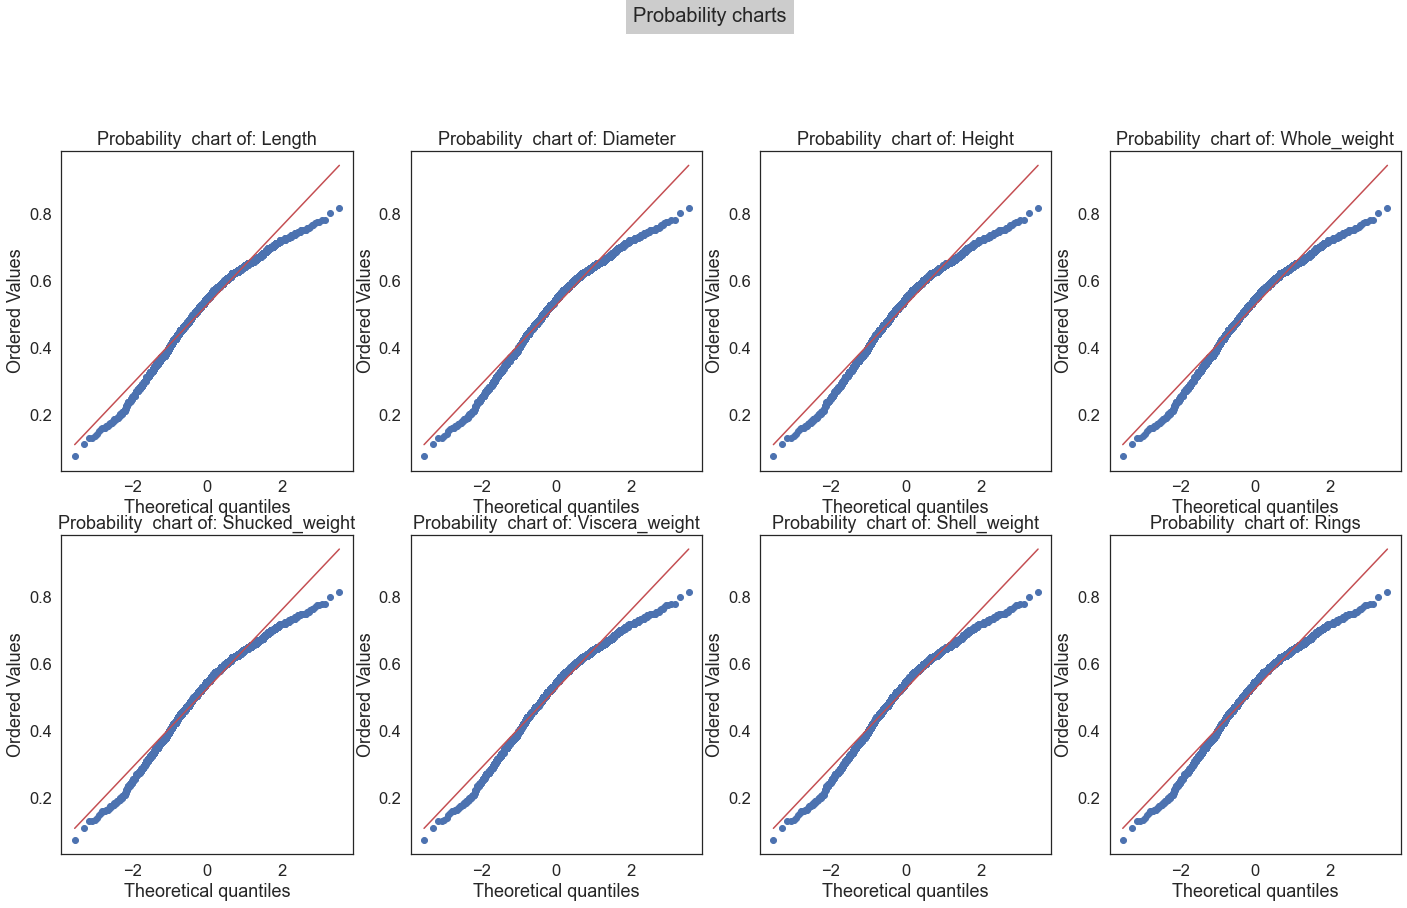

In [57]:
# let's plot the Q-Q plot for the simualted data. The dots should adjust to the 45 degree line
continuous_cols=['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
                                         'Viscera_weight', 'Shell_weight', 'Rings']
fig = plt.figure(figsize=(24, 20))
fig.suptitle('Probability charts', bbox={'facecolor':'0.8', 'pad':8}, fontsize = 20)
# Plotting scatter chart for each predictor vs the target variable
for predictor in continuous_cols:
    cntss = continuous_cols.index(predictor)    
    #print(cntss)
    colors = np.random.rand(156)
    subsc = fig.add_subplot(3, 4, cntss+1)    
    subsc.set_xlabel(predictor.upper()) 
    stats.probplot(abalone_train_data['Length'], dist="norm", plot=subsc)    
    subsc.title.set_text('Probability  chart of: '+ str(predictor))    

<AxesSubplot:xlabel='Rings'>

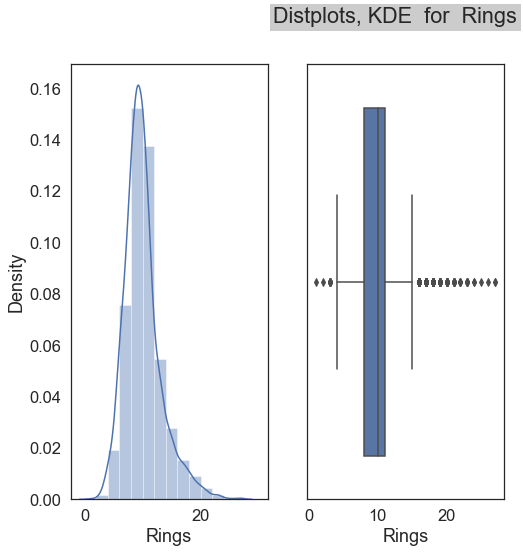

In [58]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.suptitle("Distplots, KDE  for  Rings", bbox={'facecolor':'0.8'})
sns.distplot(abalone_train_data['Rings'], kde=True, bins=range(0, 31, 2))
plt.subplot(1,3,2)
sns.boxplot(abalone_train_data['Rings'])

<AxesSubplot:xlabel='Rings'>

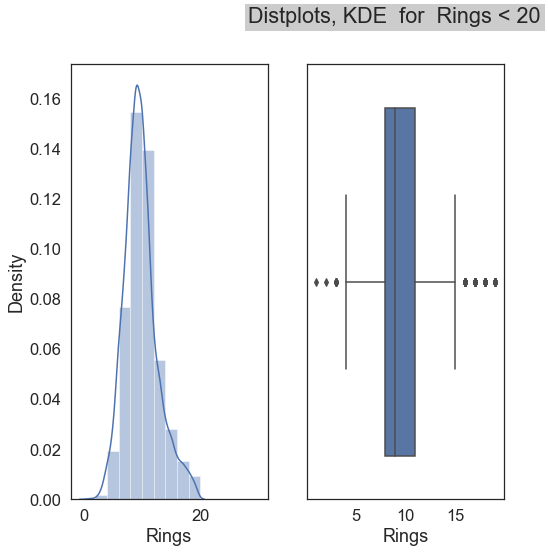

In [59]:
#WE can see there is outlier in Rings column, we will remove and see how it show later on.
abalone_train_data = abalone_train_data[abalone_train_data['Rings'] < 20]
plt.figure(figsize=(12,8))
plt.suptitle("Distplots, KDE  for  Rings < 20", bbox={'facecolor':'0.8'})
plt.subplot(1,3,1)
sns.distplot(abalone_train_data['Rings'], kde=True, bins=range(0, 31, 2))
plt.subplot(1,3,2)
sns.boxplot(abalone_train_data['Rings'])

Text(0.5, 0.98, 'Histogram for Length, Diameter,Height,Whole_Weight,Shucked_weight,Viscera_Weight, Rings')

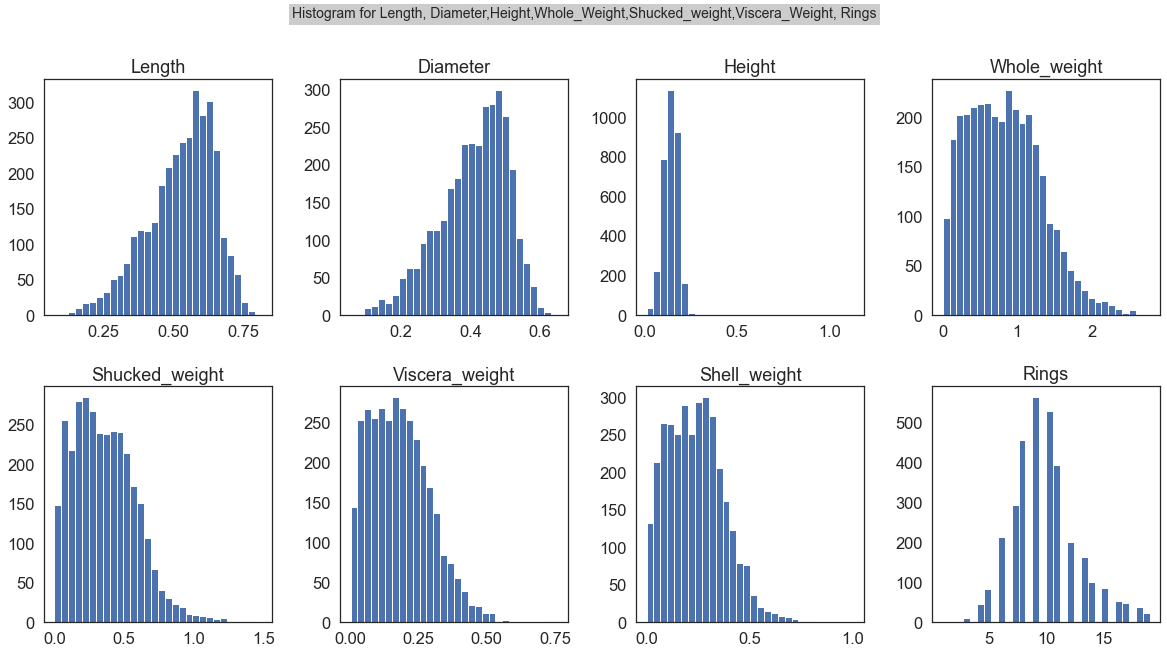

In [61]:
abalone_train_data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)
plt.suptitle("Histogram for Length, Diameter,Height,Whole_Weight,Shucked_weight,Viscera_Weight, Rings", bbox={'facecolor':'0.8'},fontsize = 14)

In [62]:
numerical_features = abalone_train_data.select_dtypes(include=[np.number]).columns
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [63]:
categorical_features = abalone_train_data.select_dtypes(include=[np.object]).columns
categorical_features 

Index(['Sex'], dtype='object')

In [64]:
abalone_train_data.skew()

Length           -0.627965
Diameter         -0.603155
Height            3.874837
Whole_weight      0.520537
Shucked_weight    0.728938
Viscera_weight    0.587724
Shell_weight      0.568033
Rings             0.686556
dtype: float64

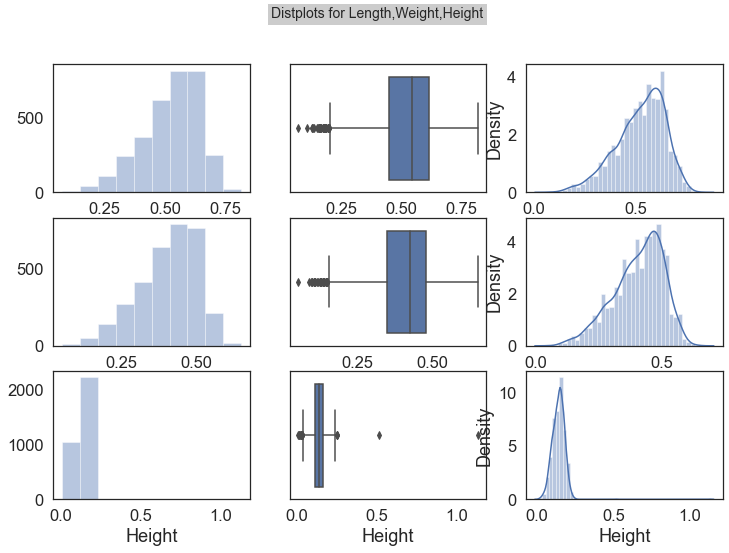

In [65]:
#Size attributes
#Size attributes includes dimension of abalone which comprises about abalone height, diameter and length.
#We will observe these attributes by showing them with histogram and boxplot.
fig=plt.figure(figsize=(12,8))
fig.suptitle("Distplots for Length,Weight,Height", bbox={'facecolor':'0.8'},fontsize = 14)
plt.subplot(3,3,1)
sns.distplot(abalone_train_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_train_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_train_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_train_data['Diameter'], kde=False, bins = 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_train_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_train_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_train_data['Height'], kde=False, bins= 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_train_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_train_data['Height']);

In [66]:
#Once more, we observe an approximate normal distribution. However we notice the high peak formed by the Height histogram. 
#Analyzing the Height boxplot we conclude that the high peak is formed due the presence of two observations that lie far 
#beyond the central positions of the distribution.Thats outlier.
#thus, we filter these outliers in order to obtain a more realistic visualization of the distribution of the Height attribute:
    

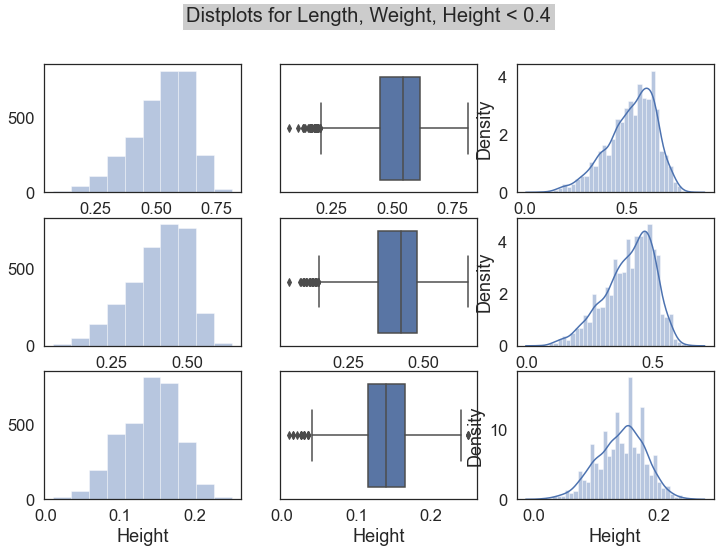

In [67]:
fig=plt.figure(figsize=(12,8))
fig.suptitle("Distplots for Length, Weight, Height < 0.4", bbox={'facecolor':'0.8'},fontsize = 20)
abalone_train_data = abalone_train_data[abalone_train_data['Height'] < 0.4]
plt.subplot(3,3,1)
sns.distplot(abalone_train_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_train_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_train_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_train_data['Diameter'], kde=False, bins= 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_train_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_train_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_train_data['Height'], kde=False, bins = 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_train_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_train_data['Height']);

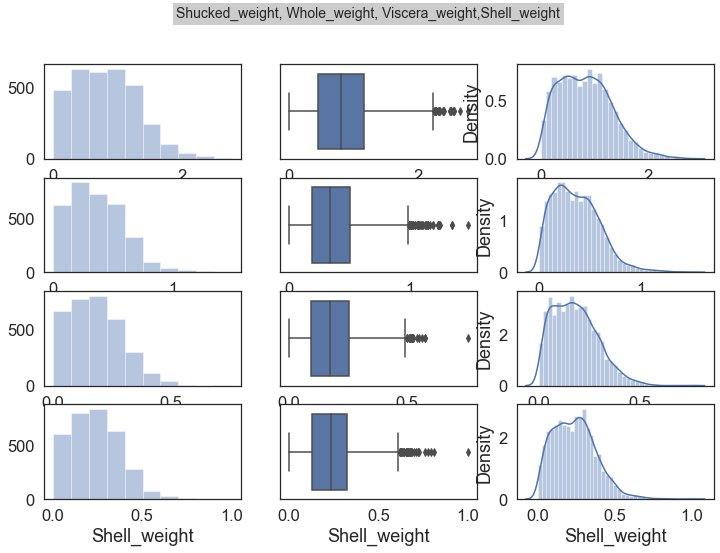

In [69]:
#Weight attributes
#The weight attributes includes rest of the wiights attributes and were analyzed following a 
#similar approach to the Size attributes analysis. A similar distributions were observed, however,
#for the weight attributes the bell curve is a little larger.
fig=plt.figure(figsize=(12,8))
fig.suptitle("Shucked_weight, Whole_weight, Viscera_weight,Shell_weight", bbox={'facecolor':'0.8'},fontsize = 14)
#plt.figure(figsize=(12,8))
plt.subplot(4,3,1)
sns.distplot(abalone_train_data['Whole_weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(abalone_train_data['Whole_weight']);
plt.subplot(4,3,3)
sns.distplot(abalone_train_data['Whole_weight']);

plt.subplot(4,3,4)
sns.distplot(abalone_train_data['Shucked_weight'], kde=False, bins= 10);
plt.subplot(4,3,5)
sns.boxplot(abalone_train_data['Shucked_weight']);
plt.subplot(4,3,6)
sns.distplot(abalone_train_data['Shucked_weight']);

plt.subplot(4,3,7)
sns.distplot(abalone_train_data['Viscera_weight'], kde=False, bins= 10);
plt.subplot(4,3,8)
sns.boxplot(abalone_train_data['Viscera_weight']);
plt.subplot(4,3,9)
sns.distplot(abalone_train_data['Viscera_weight']);

plt.subplot(4,3,10)
sns.distplot(abalone_train_data['Shell_weight'], kde=False, bins= 10);
plt.subplot(4,3,11)
sns.boxplot(abalone_train_data['Shell_weight']);
plt.subplot(4,3,12)
sns.distplot(abalone_train_data['Shell_weight']);

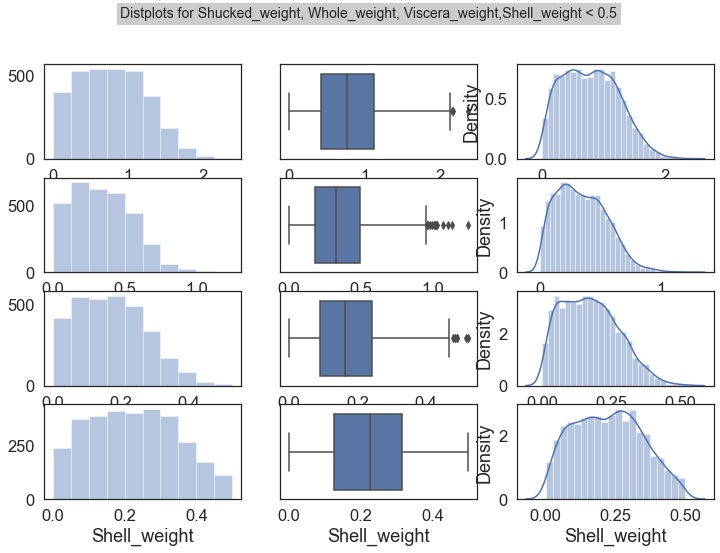

In [70]:

abalone_train_data = abalone_train_data[abalone_train_data['Shell_weight'] < 0.5]
fig=plt.figure(figsize=(12,8))
fig.suptitle("Distplots for Shucked_weight, Whole_weight, Viscera_weight,Shell_weight < 0.5", bbox={'facecolor':'0.8'},fontsize = 14)
#plt.figure(figsize=(12,8))
plt.subplot(4,3,1)
sns.distplot(abalone_train_data['Whole_weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(abalone_train_data['Whole_weight']);
plt.subplot(4,3,3)
sns.distplot(abalone_train_data['Whole_weight']);

plt.subplot(4,3,4)
sns.distplot(abalone_train_data['Shucked_weight'], kde=False, bins= 10);
plt.subplot(4,3,5)
sns.boxplot(abalone_train_data['Shucked_weight']);
plt.subplot(4,3,6)
sns.distplot(abalone_train_data['Shucked_weight']);

plt.subplot(4,3,7)
sns.distplot(abalone_train_data['Viscera_weight'], kde=False, bins= 10);
plt.subplot(4,3,8)
sns.boxplot(abalone_train_data['Viscera_weight']);
plt.subplot(4,3,9)
sns.distplot(abalone_train_data['Viscera_weight']);

plt.subplot(4,3,10)
sns.distplot(abalone_train_data['Shell_weight'], kde=False, bins= 10);
plt.subplot(4,3,11)
sns.boxplot(abalone_train_data['Shell_weight']);
plt.subplot(4,3,12)
sns.distplot(abalone_train_data['Shell_weight']);

<AxesSubplot:xlabel='Sex', ylabel='count'>

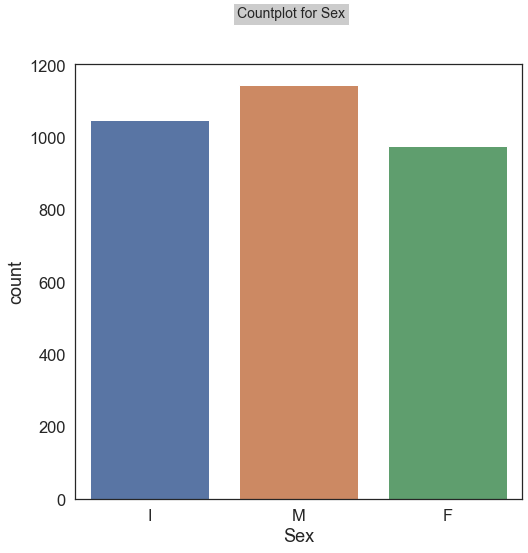

In [72]:
#The Sex attribute is a categorical variable for which the possibles values are: M for Male, F for Female and I of Infant
#(an abalone which is not adult). We analyzed the count of each category with a bar plot, and concluded that relative to 
#this attribute, the dataset is balanced.
fig=plt.figure(figsize=(8,8))
fig.suptitle("Countplot for Sex", bbox={'facecolor':'0.8'},fontsize = 14)
sns.countplot(x = 'Sex', data = abalone_train_data)

# Bivariate Analysis

In [73]:
#Bivariate analysis is vital part of data analysis process for, it gives clear picture on 
#how each features are affected in presence of other features and target feature.
#It also helps us understand and identify significance features, overcome multi-collinearity 
#effect, inter-dependency and thus, provides insights on hidden data noise pattern.

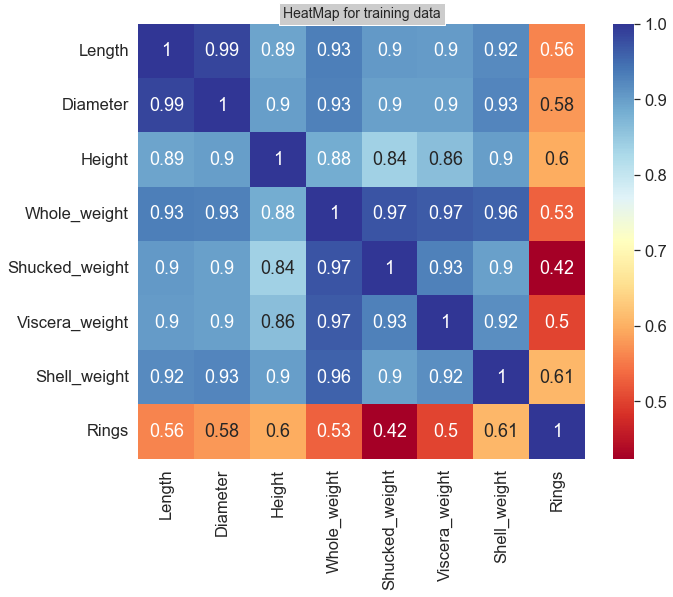

In [74]:
plt.figure(figsize=(10, 8))
plt.title("HeatMap for training data", bbox={'facecolor':'0.8'},fontsize = 14)
sns.heatmap(abalone_train_data.corr(), annot=True, cmap='RdYlBu');

In [75]:
#From the above heat map it is clear that :
#Rings is most linearly proprtional with Shell Weight followed by Diameter and length.
#Shucked_weight is least correlated with Rings
#Rings is least correlated with Shucked Weight.

In [76]:
#Analyzing the correlation matrix, we notice that Height and Shell_weight are the attributes that most correlates to Rings. 
#Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with Rings: 

Text(0.5, 0.98, 'Jointplots for Shell_wieght')

<Figure size 720x360 with 0 Axes>

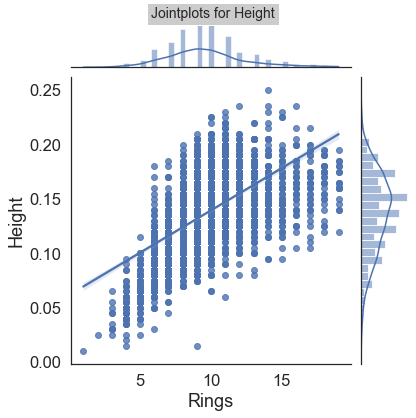

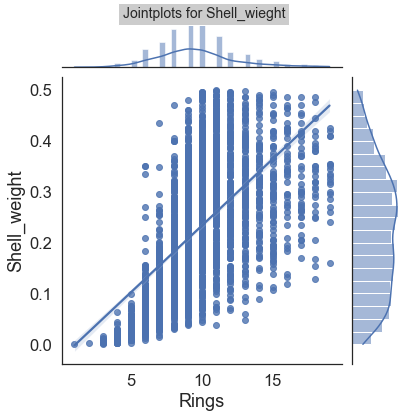

In [81]:
plt.figure(figsize=(10, 5))
#fig=plt.figure(figsize=(10,5))
#plt.suptitle("Jointplots for Height & Shell_wieght", bbox={'facecolor':'0.8'})
sns.jointplot(data=abalone_train_data, x='Rings', y='Height', kind='reg')
plt.suptitle("Jointplots for Height", bbox={'facecolor':'0.8'},fontsize = 14)
sns.jointplot(data=abalone_train_data, x='Rings', y='Shell_weight', kind='reg')
plt.suptitle("Jointplots for Shell_wieght", bbox={'facecolor':'0.8'},fontsize = 14)

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

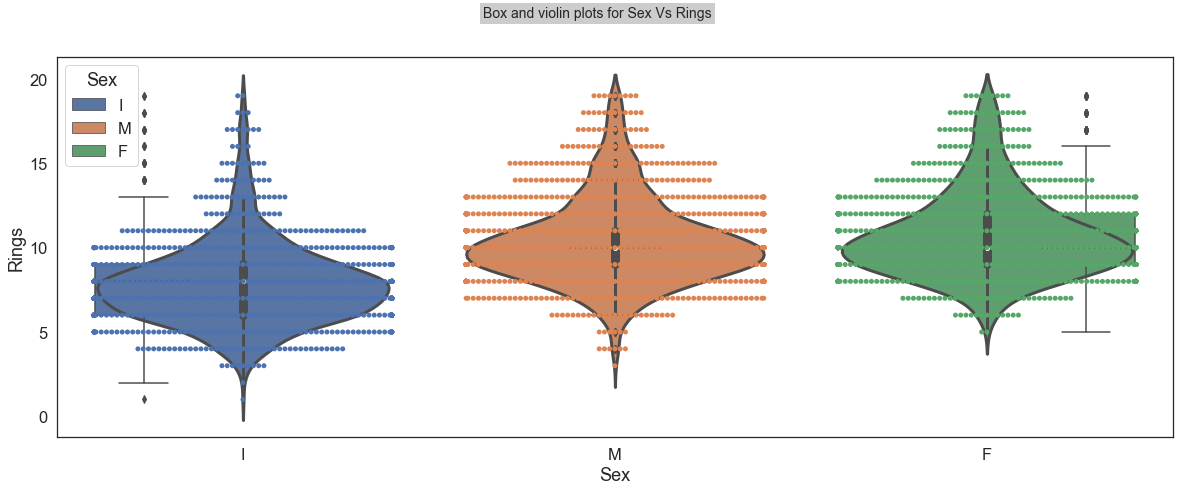

In [82]:
plt.figure(figsize = (20,7))
plt.suptitle("Box and violin plots for Sex Vs Rings", bbox={'facecolor':'0.8'},fontsize = 14)
sns.boxplot(x = 'Sex', y = 'Rings', data = abalone_train_data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Rings', data = abalone_train_data,cut=2, linewidth=3, showmedians=True, vert=True)
sns.swarmplot(x = 'Sex', y = 'Rings', data = abalone_train_data)

In [83]:
# From above looking at the rings  it looks like the male : age range is in  between 6 years to 18 years, whereas
# for female it  lies in between  years to 19 years and for 
# immature the age range lies in between () years to  (14-1.5)12.5 years

Text(0.5, 0.98, 'Pairplot for training data')

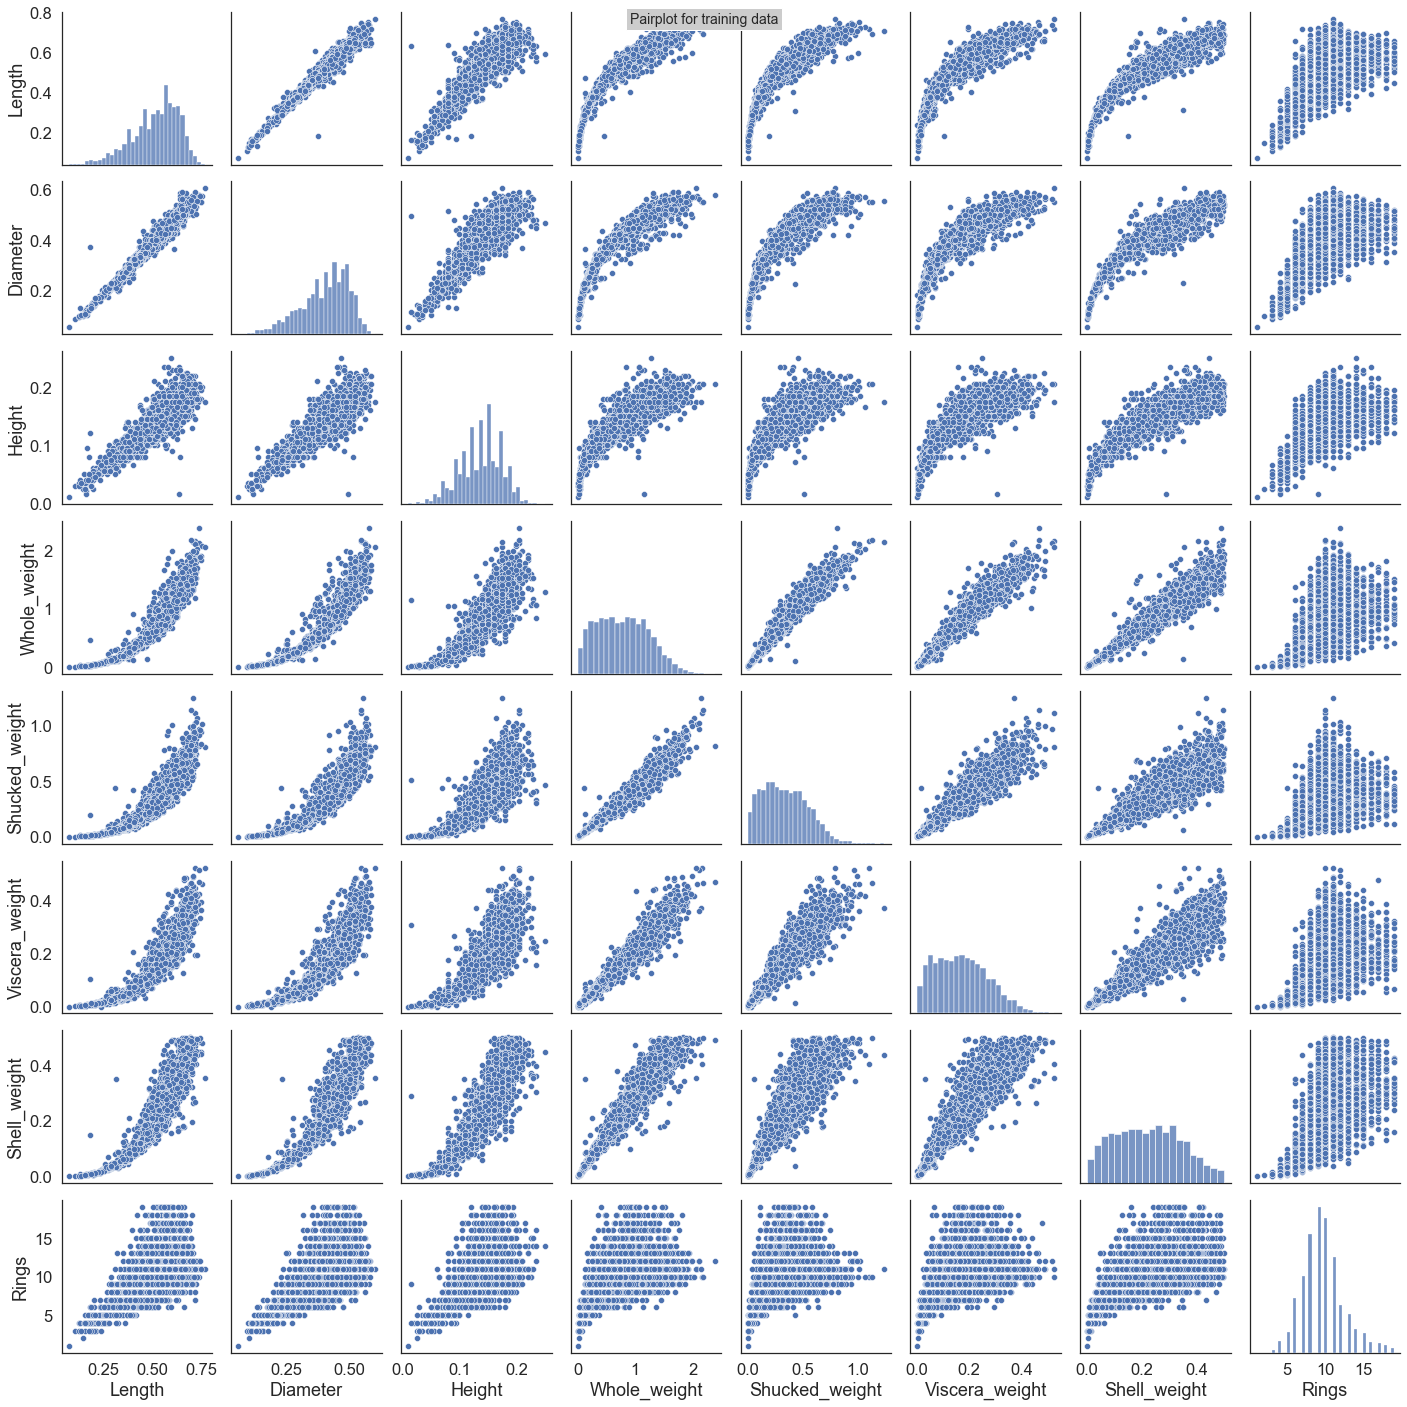

In [84]:
sns.pairplot(abalone_train_data[numerical_features])
plt.suptitle("Pairplot for training data", bbox={'facecolor':'0.8'},fontsize = 14)

In [85]:
# From above : length is linearly correlated with diameter while, 
# non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight.

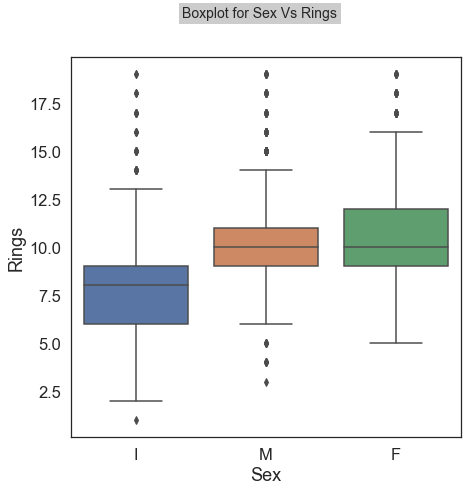

In [271]:
#Influence of Sex on attributes
#Finally, we analyze how the Sex category influences the distribution of variables Rings, Height and Shell weight. 
#Our objective is to learn if the different categories of abalones have different distribution parameters or even form. 
#To accomplish this objective, we visualize the distribution of each one of these parameters in relation to Sex. 
#Finally, we analyze how the different Sex categories of abalones influence the correlation of Rings, Height and Shell weight.

plt.figure(figsize=(7, 7))
plt.suptitle("Boxplot for Sex Vs Rings", bbox={'facecolor':'0.8'},fontsize = 14)
sns.boxplot(data=abalone_train_data, x='Sex', y='Rings');

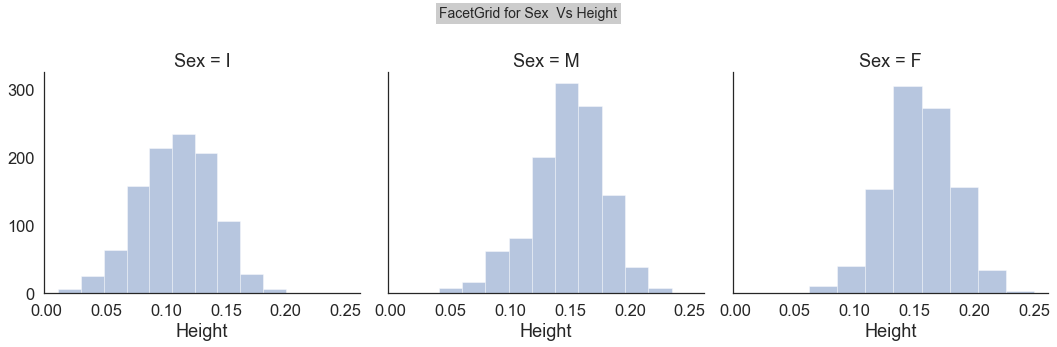

In [281]:
g = sns.FacetGrid(abalone_train_data, col='Sex', margin_titles=True, size=5)
plt.suptitle("FacetGrid for Sex  Vs Height", bbox={'facecolor':'0.8'}, fontsize = 14)
g.map(sns.distplot, 'Height', kde=False, bins= 10);

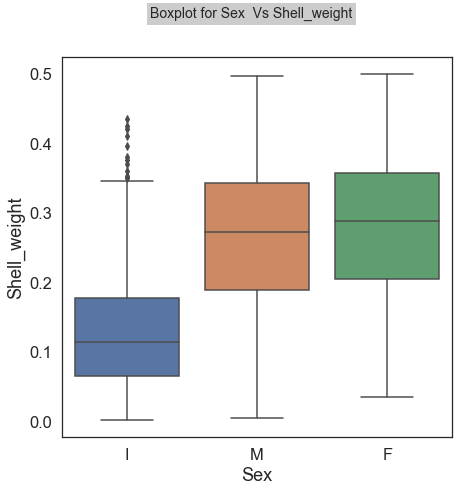

In [275]:
#For shell weight
plt.figure(figsize=(7, 7))
plt.suptitle("Boxplot for Sex  Vs Shell_weight", bbox={'facecolor':'0.8'},fontsize = 14)
sns.boxplot(data=abalone_train_data, x='Sex', y='Shell_weight');

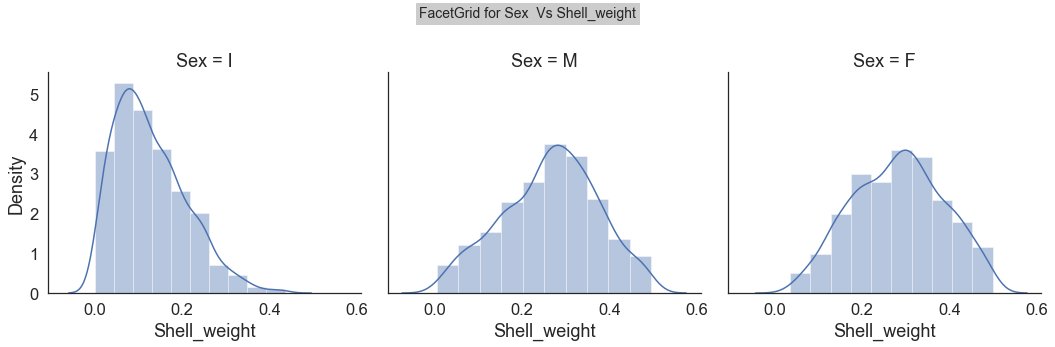

In [89]:
g = sns.FacetGrid(abalone_train_data, col='Sex', margin_titles=True, size=5)
plt.suptitle("FacetGrid for Sex  Vs Shell_weight", bbox={'facecolor':'0.8'},fontsize = 14)
g.map(sns.distplot, 'Shell_weight', kde=True, bins= 10);

In [68]:
#Finally, we analyze how the sex categories influence the correlations Rings & Height and Rings & Shell weight. 
#We already concluded that these attributes has stronger correlation for lower values of Rings. 
#Because Infant abalones have lower values of Rings, the consequence is that Height and Shell weight have stronger
#correlation to rings. Observing the regression curve for the Infant category, we notice that its inclination is closer to 45°.

#we conclude that it is possible to build a model to predict the target value in function of the independent attributes.

Text(0.5, 1.0, 'LMplot for Shell_weight  Vs Rings')

<Figure size 1440x360 with 0 Axes>

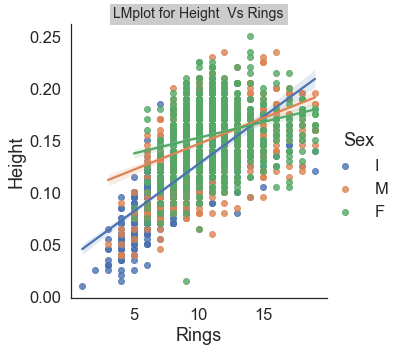

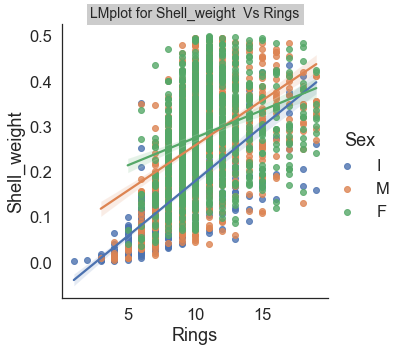

In [90]:
plt.figure(figsize=(20, 5))
sns.lmplot(data=abalone_train_data, x='Rings', y='Height', hue='Sex', fit_reg=True);
plt.title("LMplot for Height  Vs Rings", bbox={'facecolor':'0.8'},fontsize = 14)
sns.lmplot(data=abalone_train_data, x='Rings', y='Shell_weight', hue='Sex', fit_reg=True);
plt.title("LMplot for Shell_weight  Vs Rings", bbox={'facecolor':'0.8'},fontsize = 14)

In [91]:
abalone_test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,836.0,0.516417,0.121196,0.1400,0.445000,0.53500,0.610000,0.7700
Diameter,836.0,0.401561,0.100419,0.1050,0.345000,0.42000,0.475000,0.6200
Height,836.0,0.137069,0.038410,0.0200,0.110000,0.14000,0.165000,0.2400
Whole_weight,836.0,0.791042,0.474981,0.0145,0.432625,0.77075,1.097375,2.8255
Shucked_weight,836.0,0.342452,0.212260,0.0050,0.177875,0.32025,0.472000,1.1465
Viscera_weight,836.0,0.172949,0.105973,0.0030,0.091500,0.16125,0.242625,0.6415
Shell_weight,836.0,0.228623,0.136280,0.0050,0.121000,0.22000,0.315000,0.8970


In [92]:
abalone_test_data.iloc[:1,]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Id,,,,,,,,
668,M,0.55,0.425,0.155,0.9175,0.2775,0.243,0.335


In [96]:
abalone_train_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [97]:
abalone_train_data[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight']].corrwith(abalone_train_data.Rings).to_frame('correlation')

,correlation
Length,0.561071
Diameter,0.577430
Height,0.596935
Whole_weight,0.529471
Shucked_weight,0.423775
Viscera_weight,0.502401
Shell_weight,0.607845


In [98]:
# performing categorical variable to numeric variable with label encoder to make uniform data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
abalone_train_data['Sex']= le.fit_transform(abalone_train_data['Sex'])
abalone_train_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Id,,,,,,,,,
3141,1,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
3521,1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
883,2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3627,2,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
2106,2,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [99]:
X_train = abalone_train_data.drop(["Rings"], axis=1)
y_train = abalone_train_data['Rings']
X_train.shape

(3170, 8)

In [100]:
X_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [101]:
le = LabelEncoder()
abalone_test_data['Sex']= le.fit_transform(abalone_test_data['Sex'])
abalone_test_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Id,,,,,,,,
668,2,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,1,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,2,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [102]:
X_test = abalone_test_data.copy()
#y_test = abalone_test_data['Rings']

In [103]:
X_test.shape

(836, 8)

In [104]:
X_test.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Id,,,,,,,,
668,2,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,1,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,2,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775
1399,0,0.650,0.505,0.165,1.1600,0.4785,0.2740,0.3490
2054,2,0.465,0.360,0.110,0.4955,0.2665,0.0850,0.1210
2058,2,0.485,0.390,0.135,0.6170,0.2500,0.1345,0.1635
217,1,0.405,0.300,0.120,0.3240,0.1265,0.0700,0.1100


In [105]:
X_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [106]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [107]:
# Model training
model.fit(X_train, y_train)

LinearRegression()

In [108]:
coeff_df = pd.DataFrame(model.coef_,X_train.columns,columns=['Coefficient'])
intercept = model.intercept_
print(coeff_df,"\nIntecept =",intercept)

                Coefficient
Sex                0.046559
Length            -1.116262
Diameter          11.048527
Height            19.803826
Whole_weight       8.757846
Shucked_weight   -19.471007
Viscera_weight    -8.531716
Shell_weight       6.995875 
Intecept = 2.732010828562526


In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,X_train,y_train,cv=5,scoring='r2')
    
print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))

CV Mean:  0.5018300195069451
STD:  0.02343787310112418


In [110]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_train,y_pred_test

(array([ 5.67041642,  5.36273301, 13.35132881, ...,  9.3996984 ,
        11.50861357,  8.43194892]),
 array([12.87893279,  9.46287569, 10.2705163 ,  5.54142289, 10.64735981,
        11.79967218,  7.73375261,  9.79833347,  8.56428714, 11.92358363,
         8.76655608,  6.48470357,  8.09553835,  8.91330007,  5.7422881 ,
         9.15666726,  7.67582889, 13.96254903, 11.06108688,  8.06956893,
         7.6988    ,  7.0592106 ,  9.17485908,  7.4721465 ,  9.99272179,
        11.41457324,  4.46254513, 13.04137878, 10.73915011, 11.05108427,
         7.91153799,  4.33006345, 11.3044526 , 13.09038343,  7.55966589,
         8.58971678,  9.08548333, 10.13870455,  8.62137311, 11.33083829,
        11.78268085,  9.21787011, 11.73574209, 11.7816403 , 12.33820444,
         9.38845775,  9.08813178, 11.70341995, 12.14844378,  8.15768429,
        11.34859687,  7.42096135,  8.88754779, 13.31109658,  9.04403399,
         7.57674765,  6.10480308,  7.22685562,  7.51586863,  7.25257405,
         9.60325811,  9

In [111]:
y_pred_train.shape,y_pred_test.shape

((3170,), (836,))

In [112]:
#Computing the MSE for our resale value predictions¶
from sklearn import metrics 
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
#MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
#print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.4839546813596567


In [113]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
#MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
#print('MSE for test set is {}'.format(MSE_test))



MSE for training set is 3.935223348801518


In [114]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
#RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
#print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.9837397381716984


In [115]:
r2_train = metrics.r2_score(y_train,y_pred_train)
#r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
#print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.5046853453439908


In [116]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
#adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
#print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.5034317808905747


In [117]:
#Using the Model for Prediction
y_pred_train = model.predict(X_train)  

In [118]:
y_pred_train

array([ 5.67041642,  5.36273301, 13.35132881, ...,  9.3996984 ,
       11.50861357,  8.43194892])

# Predict the output target variable

In [119]:
y_pred_test = model.predict(X_test)          

In [120]:
y_pred_test

array([12.87893279,  9.46287569, 10.2705163 ,  5.54142289, 10.64735981,
       11.79967218,  7.73375261,  9.79833347,  8.56428714, 11.92358363,
        8.76655608,  6.48470357,  8.09553835,  8.91330007,  5.7422881 ,
        9.15666726,  7.67582889, 13.96254903, 11.06108688,  8.06956893,
        7.6988    ,  7.0592106 ,  9.17485908,  7.4721465 ,  9.99272179,
       11.41457324,  4.46254513, 13.04137878, 10.73915011, 11.05108427,
        7.91153799,  4.33006345, 11.3044526 , 13.09038343,  7.55966589,
        8.58971678,  9.08548333, 10.13870455,  8.62137311, 11.33083829,
       11.78268085,  9.21787011, 11.73574209, 11.7816403 , 12.33820444,
        9.38845775,  9.08813178, 11.70341995, 12.14844378,  8.15768429,
       11.34859687,  7.42096135,  8.88754779, 13.31109658,  9.04403399,
        7.57674765,  6.10480308,  7.22685562,  7.51586863,  7.25257405,
        9.60325811,  9.02703044, 10.29209527,  8.11483013,  8.28728146,
       12.07718903, 12.39697022, 12.34426938,  9.10182283, 14.07

In [121]:
# To create Dataframe of predicted value with particular respective index
predicted_rings = pd.DataFrame(y_pred_test) 
# predicted_Rings are nothing but the final predictions of your model on input features of your new unseen test data
predicted_rings.index = abalone_test_data.index 
# its important for comparison. Here "test_new" is your new test dataset
predicted_rings.columns = ["Rings_prediction_test_data"]

# To download the csv file locally
#from google.colab import files
predicted_rings.to_csv('abalone_submission_sagar.csv',header=False)
#files.download('abalone_submission.csv')

In [122]:
predicted_rings.head()

,Rings_prediction_test_data
Id,
668,12.878933
1580,9.462876
3784,10.270516
463,5.541423
2615,10.647360


In [123]:
# import mean squared error from sklearn.metric
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error is: ', rmse)

Root Mean Squared Error is:  1.9837397381716984
